# Count Animals

In [1]:
import os
from urllib.request import urlretrieve

# load the database from the example repository and the first image as an example
urls = ["https://bitbucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PenguinCount/count.cdb", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PenguinCount/20150312-110000_microbs_GoPro.jpg"]
for url in urls:
    file = os.path.basename(url)
    if not os.path.exists(file):
        print("Downloading File", file)
        urlretrieve(url, file)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import clickpoints

# open database
db = clickpoints.DataFile("count.cdb")

path count.cdb
Open database with version 18


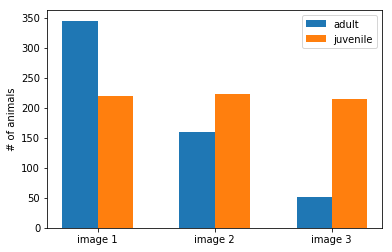

In [3]:
# iterate over images
for index, image in enumerate(db.getImages()):
    # get count of adults in current image
    marker = db.getMarkers(image=image, type="adult")
    bar1 = plt.bar(index-0.15, marker.count(), color='C0', width=0.3)

    # get count of juveniles in current image
    marker = db.getMarkers(image=image, type="juvenile")
    bar2 = plt.bar(index+0.15, marker.count(), color='C1', width=0.3)

# add labels
plt.ylabel("# of animals")
plt.xticks([0, 1, 2], ["image 1", "image 2", "image 3"])
# add a lagend
plt.legend((bar1[0], bar2[0]), ("adult", "juvenile"))
# display the plot
plt.show()

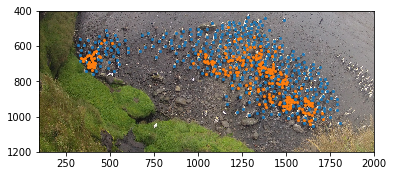

In [4]:
# get the first image
im_entry = db.getImage(0)

# we load the pixel data from the Image database entry
im_pixel = im_entry.data

# plot the image
plt.imshow(im_pixel, cmap="gray")

# iterate over the adults in the image
for marker in db.getMarkers(image=im_entry, type="adult"):
    # plot the coordinates of the marker
    plt.plot(marker.x, marker.y, 'C0o', ms=2)
    
# iterate over the juveniles in the iamge
for marker in db.getMarkers(image=im_entry, type="juvenile"):
    # plot the coordinates of the marker
    plt.plot(marker.x, marker.y, 'C1o', ms=2)

# zoom into the image
plt.xlim(100, 2000)
plt.ylim(1200, 400)
plt.show()